# Lab02 - Differential GNSS and RTK

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# Comparing GNSS points across groups

In [2]:
gnss_lab01_pts = pd.read_csv('../data/Anonymous_GNSS_Lab01_Responses.csv')

# build geopandas points for OPUS with z values from first three columns
opus_geometry = gpd.points_from_xy(gnss_lab01_pts['OPUS_LON'], gnss_lab01_pts['OPUS_LAT'], gnss_lab01_pts['OPUS_ELHGT'])
gnss_lab01_opus_pts = gpd.GeoDataFrame(geometry=opus_geometry, crs='EPSG:4326')
# add a columns titled "type" with value "OPUS"
gnss_lab01_opus_pts['type'] = 'OPUS'

# build geopandas points for CSRS with z values from first three columns
csrs_geometry = gpd.points_from_xy(gnss_lab01_pts['CSRS_LON'], gnss_lab01_pts['CSRS_LAT'], gnss_lab01_pts['CSRS_ELHGT'])
gnss_lab01_csrs_pts = gpd.GeoDataFrame(geometry=csrs_geometry, crs='EPSG:4326')
# add a column titled "type" with value "CSRS"
gnss_lab01_csrs_pts['type'] = 'CSRS'

# build geopandas points for PHONE with z values from last three columns
phone_geometry = gpd.points_from_xy(gnss_lab01_pts['PHONE_LON'], gnss_lab01_pts['PHONE_LAT'], gnss_lab01_pts['PHONE_ORTHGT'])
gnss_lab01_phone_pts = gpd.GeoDataFrame(geometry=phone_geometry, crs='EPSG:4326')
# add a column titled "type" with value "PHONE"
gnss_lab01_phone_pts['type'] = 'PHONE'

# combine gnss_lab01_opus_pts, gnss_lab01_csrs_pts, and gnss_lab01_phone_pts into a single geopandas dataframe
gnss_lab01_all_pts = pd.concat([gnss_lab01_opus_pts, gnss_lab01_csrs_pts, gnss_lab01_phone_pts])

### Update the CRS to UTM Zone 10 N

In [3]:
# update crs to utm zone 10n
gnss_lab01_all_pts_utm = gnss_lab01_all_pts.to_crs('EPSG:32610')


(array([551000., 552000., 553000., 554000.]),
 [Text(551000.0, 0, '551000'),
  Text(552000.0, 0, '552000'),
  Text(553000.0, 0, '553000'),
  Text(554000.0, 0, '554000')])

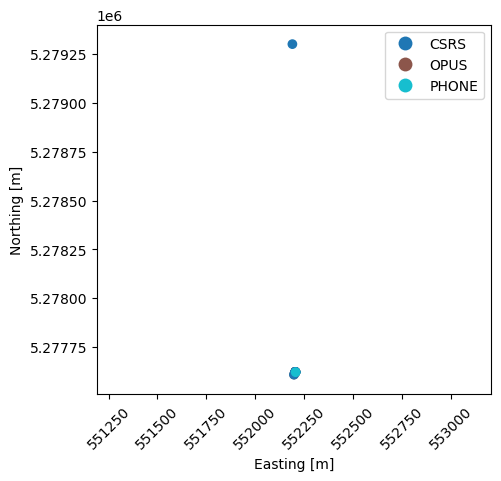

In [4]:
# update crs to utm zone 10n
gnss_lab01_all_pts_utm = gnss_lab01_all_pts.to_crs('EPSG:32610')

# create a plot of the x,y points with axes units of meters
fig, ax = plt.subplots()
gnss_lab01_all_pts_utm.plot(ax=ax, column='type', legend=True)
# add x,y units 
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
# set xlim to 10 meters outside the extremes of the data
ax.set_xlim(gnss_lab01_all_pts_utm.total_bounds[0]-1000, gnss_lab01_all_pts_utm.total_bounds[2]+1000)
# set ylim to 10 meters outside the extremes of the data
ax.set_ylim(gnss_lab01_all_pts_utm.total_bounds[1]-100, gnss_lab01_all_pts_utm.total_bounds[3]+100)
# rotate x axis labels
plt.xticks(rotation=45)

In [5]:
print('x mean, median mode:')
# print the mean of the x geometry points
print(gnss_lab01_all_pts_utm.geometry.x.mean())
# print the median of the x geometry points
print(gnss_lab01_all_pts_utm.geometry.x.median())
# print the mode of the x geometry points
print(gnss_lab01_all_pts_utm.geometry.x.mode()[0])

print('y mean, median, mode:')
# print the mean of the y geometry points
print(gnss_lab01_all_pts_utm.geometry.y.mean())
# print the median of the y geometry points
print(gnss_lab01_all_pts_utm.geometry.y.median())
# print the mode of the y geometry points
print(gnss_lab01_all_pts_utm.geometry.y.mode()[0])

print('z mean, median, mode:')
# print the mean of the z geometry points
print(gnss_lab01_all_pts_utm[gnss_lab01_all_pts_utm['type']!='PHONE'].geometry.z.mean())
# print the median of the z geometry points
print(gnss_lab01_all_pts_utm[gnss_lab01_all_pts_utm['type']!='PHONE'].geometry.z.median())
# print the mode of the z geometry points
print(gnss_lab01_all_pts_utm[gnss_lab01_all_pts_utm['type']!='PHONE'].geometry.z.mode()[0])


x mean, median mode:
552204.5291947742
552205.4920185722
552205.4692598674
y mean, median, mode:
5277689.082937993
5277623.118805279
5277623.118805279
z mean, median, mode:
-1.101375
-1.142
-1.232


# Map survey points from Lab02

In [6]:
lab02_pts = gpd.read_file('../data/Points.shp')

In [7]:
lab02_pts.crs

<Compound CRS: COMPD_CS["NAD83(2011) / UTM zone 10N + NAVD88_GEOI ...>
Name: NAD83(2011) / UTM zone 10N + NAVD88_GEOID12B_height
Axis Info [cartesian|vertical]:
- [east]: Easting (metre)
- [north]: Northing (metre)
- [up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83(2011) / UTM zone 10N
- NAVD88_GEOID12B_height

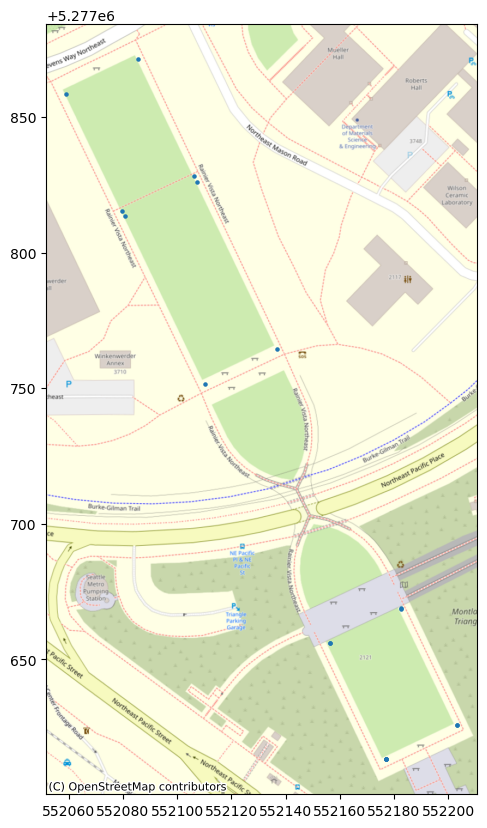

In [8]:
# create a plot of the x,y points with axes units of meters
fig, ax = plt.subplots(figsize=(10,10))
lab02_pts.plot(ax=ax, markersize=5)
# add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom='auto', crs='EPSG:32610')

In [9]:
lab2_track = pd.read_csv('../data/TACOrover_solution_20231009195919.LLH', delimiter='\s+', header=None) 

In [10]:
lab2_track = lab2_track.rename(columns={
    2:'lat',
    3:'lon',
    4:'h'
})

In [11]:
pts_from_xy = gpd.points_from_xy(lab2_track['lon'], lab2_track['lat'], lab2_track['h'])
lab2_track_gdf = gpd.GeoDataFrame(geometry=pts_from_xy, crs='EPSG:4326')
lab2_track_gdf_utm = lab2_track_gdf.to_crs('EPSG:32610')


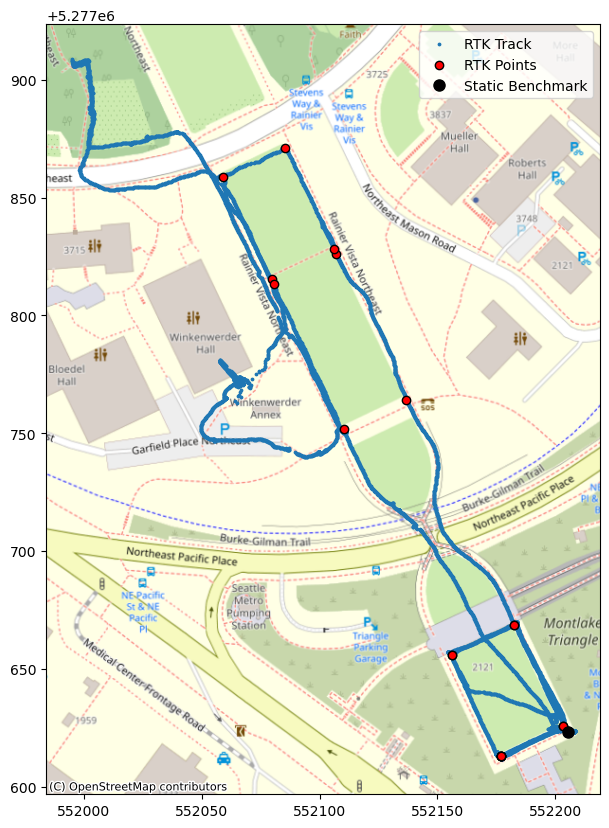

In [12]:
# plot track with basemap
fig, ax = plt.subplots(figsize=(10,10))
lab2_track_gdf_utm.plot(ax=ax, markersize=3,label='RTK Track')
lab02_pts.plot(ax=ax, color='red',
               ec='k',
               label='RTK Points')
# plot static benchmark point
ax.plot(gnss_lab01_all_pts_utm.geometry.x.median(), 
        gnss_lab01_all_pts_utm.geometry.y.median(), 
        'o', 
        color='black', 
        markersize=8,
        label='Static Benchmark')
# add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom='auto', crs='EPSG:32610')
# add legend
ax.legend()

In [21]:
lora_montlake_pts = lab02_pts.loc[3:6]
ntrip_montlake_pts = lab02_pts.iloc[-4:]

In [34]:
print(lora_montlake_pts[['Easting','Northing']].iloc[1])
print(ntrip_montlake_pts[['Easting','Northing']].iloc[0])

Easting      552203.390
Northing    5277625.733
Name: 4, dtype: object
Easting      552203.400
Northing    5277625.736
Name: 15, dtype: object


In [30]:
ntrip_montlake_pts

,Name,Code,Easting,Northing,Elevation,Desc,Longitude,Latitude,Ellips ht,Origin,...,Solution,Avg start,Avg end,Samples,PDOP,Base E,Base N,Base elev,Baseline,geometry
15,se corner NTRIP,NaN,552203.400,5277625.736,23.361,5 second averaging,-122.30486853,47.64992194,-0.386,Global,...,FIX,2023-10-09 14:25:50.2 UTC-07:00,2023-10-09 14:25:55.2 UTC-07:00,26,1.1,552200.290,5277627.408,21.028,5.542,POINT Z (552203.400 5277625.736 23.361)
16,ne corner NTRIP 1,NaN,552182.743,5277668.727,25.692,5 second averaging,-122.30513845,47.65031040,1.946,Global,...,FIX,2023-10-09 14:27:26.8 UTC-07:00,2023-10-09 14:27:31.8 UTC-07:00,26,1.2,552200.290,5277627.408,21.028,45.391,POINT Z (552182.743 5277668.727 25.692)
17,ne corner NTRIP 2,NaN,552156.389,5277656.075,25.679,5 second averaging,-122.30549087,47.65019870,1.932,Global,...,FIX,2023-10-09 14:29:00.8 UTC-07:00,2023-10-09 14:29:05.8 UTC-07:00,26,1.2,552200.290,5277627.408,21.028,52.862,POINT Z (552156.389 5277656.075 25.679)
18,ne corner NTRIP 3,NaN,552176.979,5277613.073,23.360,5 second averaging,-122.30522184,47.64981015,-0.386,Global,...,FIX,2023-10-09 14:31:09.8 UTC-07:00,2023-10-09 14:31:14.8 UTC-07:00,26,1.2,552200.290,5277627.408,21.028,27.707,POINT Z (552176.979 5277613.073 23.360)


In [28]:
lora_montlake_pts

,Name,Code,Easting,Northing,Elevation,Desc,Longitude,Latitude,Ellips ht,Origin,...,Solution,Avg start,Avg end,Samples,PDOP,Base E,Base N,Base elev,Baseline,geometry
3,sw corner 7,NaN,552176.986,5277613.076,23.225,60 second averaging,-122.30522175,47.64981018,-0.522,Global,...,FIX,2023-10-09 13:31:06.8 UTC-07:00,2023-10-09 13:32:06.8 UTC-07:00,301,1.1,552206.923,5277622.791,25.212,31.486,POINT Z (552176.986 5277613.076 23.225)
4,se corner,NaN,552203.390,5277625.733,23.226,5 second averaging,-122.30486867,47.64992192,-0.521,Global,...,FIX,2023-10-09 13:37:00.2 UTC-07:00,2023-10-09 13:37:05.2 UTC-07:00,26,1.1,552206.923,5277622.791,25.212,4.600,POINT Z (552203.390 5277625.733 23.226)
5,ne corner1,NaN,552182.712,5277668.674,25.550,5 second averaging,-122.30513887,47.65030993,1.804,Global,...,FIX,2023-10-09 13:39:34.6 UTC-07:00,2023-10-09 13:39:39.6 UTC-07:00,26,1.2,552206.923,5277622.791,25.212,51.952,POINT Z (552182.712 5277668.674 25.550)
6,nw corner2,NaN,552156.389,5277656.041,25.533,5 second averaging,-122.30549087,47.65019839,1.786,Global,...,FIX,2023-10-09 13:40:57.6 UTC-07:00,2023-10-09 13:41:02.6 UTC-07:00,26,1.2,552206.923,5277622.791,25.212,60.553,POINT Z (552156.389 5277656.041 25.533)
